In [1]:
from PIL import Image
import pandas as pd 
import os
import numpy as np 
import random
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid import ImageGrid
from sklearn.model_selection import train_test_split
# local module import
from preprocessing import load_dataset

<ipython-input-1-06893ce29789>:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid import ImageGrid


In [2]:
# Path to all data
DATA_PATH = "../dataset_mri/lgg-mri-segmentation/kaggle_3m/"
IMG_SIZE=224
dataset=load_dataset(DATA_PATH)
dataset.head()

patient_id  \
0   TCGA_CS_4941_19960909_1   
1  TCGA_CS_4941_19960909_10   
2  TCGA_CS_4941_19960909_11   
3  TCGA_CS_4941_19960909_12   
4  TCGA_CS_4941_19960909_13   

                                          image_path  \
0  ../dataset_mri/lgg-mri-segmentation/kaggle_3m/...   
1  ../dataset_mri/lgg-mri-segmentation/kaggle_3m/...   
2  ../dataset_mri/lgg-mri-segmentation/kaggle_3m/...   
3  ../dataset_mri/lgg-mri-segmentation/kaggle_3m/...   
4  ../dataset_mri/lgg-mri-segmentation/kaggle_3m/...   

                                          image_data  \
0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
1  [[2, 3, 3, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 3, 4,...   
2  [[1, 1, 2, 2, 3, 2, 4, 3, 3, 3, 2, 2, 2, 3, 5,...   
3  [[4, 2, 2, 4, 3, 2, 2, 2, 3, 4, 4, 3, 2, 2, 3,...   
4  [[3, 1, 2, 3, 2, 3, 4, 5, 6, 5, 3, 2, 2, 2, 4,...   

                                           mask_path  \
0  ../dataset_mri/lgg-mri-segmentation/kaggle_3m/...   
1  ../dataset_mri/lgg-mri-segmentation/kaggle_3m/...   
2  ../dataset_mri/lgg-mri-segmentation/kaggle_3m/...   
3  ../dataset_mri/lgg-mri-segmentation/kaggle_3m/...   
4  ../dataset_mri/lgg-mri-segmentation/kaggle_3m/...   

                                           mask_data  tumor  
0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      0  
1  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      0  
2  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      1  
3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      1  
4  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      1

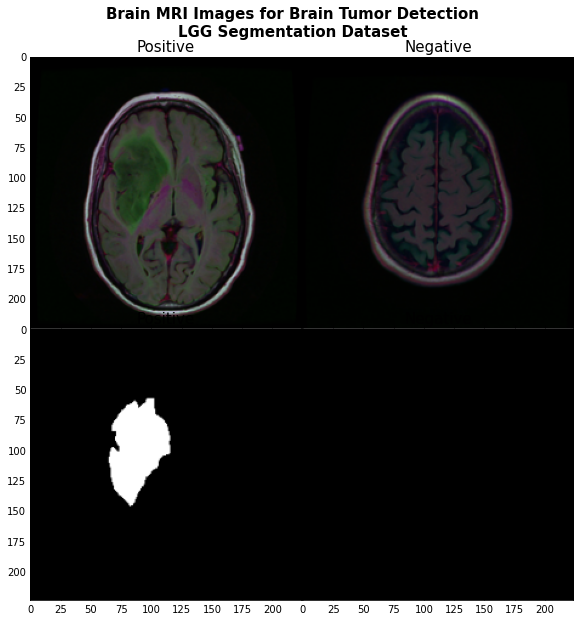

In [3]:
# Data
sample_yes_df = dataset[dataset["tumor"] == 1].sample(2)
sample_no_df = dataset[dataset["tumor"] == 0].sample(2)
image_yes = sample_yes_df.image_path.values
image_no= sample_no_df.image_path.values
mask_yes = sample_yes_df.mask_path.values
mask_no= sample_no_df.mask_path.values

sample_imgs = []
for i, (yes, no,yes_mask,no_mask) in enumerate(zip(image_yes, image_no, mask_yes, mask_no)):
    yes = cv2.resize(cv2.imread(yes), (IMG_SIZE, IMG_SIZE))
    no = cv2.resize(cv2.imread(no), (IMG_SIZE, IMG_SIZE))
    yes_mask= cv2.resize(cv2.imread(yes_mask), (IMG_SIZE, IMG_SIZE))
    no_mask= cv2.resize(cv2.imread(no_mask), (IMG_SIZE, IMG_SIZE))

# Plot
fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111, nrows_ncols=(2, 2))

#MR Images
grid[0].imshow(yes)
grid[0].set_title("Positive", fontsize=15)
grid[0].axis("off")
grid[1].imshow(no)
grid[1].set_title("Negative", fontsize=15)
grid[1].axis("off")
#Mask corresponding
grid[2].imshow(yes_mask)
grid[2].set_title("Positive", fontsize=15)
grid[2].axis("off")
grid[3].imshow(no_mask)
grid[3].set_title("Negative", fontsize=15)
grid[3].axis("off")
# annotations
plt.suptitle("Brain MRI Images for Brain Tumor Detection\nLGG Segmentation Dataset", y=.95, fontsize=15, weight="bold")

# save and show
plt.savefig("dataset.png", bbox_inches='tight', pad_inches=0.2, transparent=True)
plt.show()

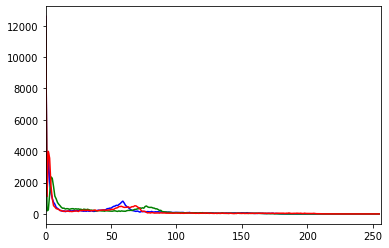

In [7]:
def calculhisto(I,color):
    for i,col in enumerate(color):
        histr = cv2.calcHist([I],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
    plt.show()
    
    
hist = calculhisto(yes,('b','g','r'))

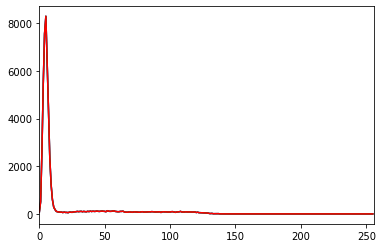

In [8]:
hist = calculhisto(no,('b','g','r'))

In [7]:
img = cv2.imread("../dataset_mri/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_15.tif")

In [8]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [10]:
fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 2))

#MR Images
grid[0].imshow(img)
grid[0].set_title("!original", fontsize=15)
grid[0].axis("off")
grid[1].imshow(gray,cmap='gray')
grid[1].set_title("Grey scale", fontsize=15)
grid[1].axis("off")

AttributeError: 'AxesImage' object has no property 'cmpa'

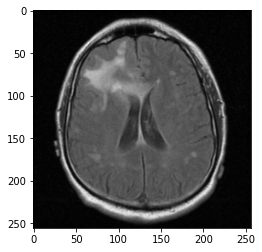

In [19]:
plt.imshow(gray, cmap='gray')

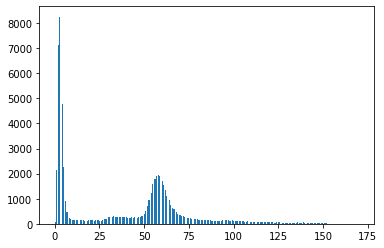

In [20]:
plt.hist(gray.ravel(),256)
plt.show()

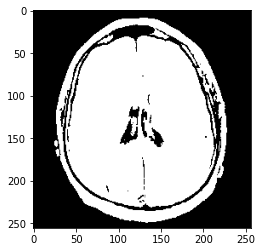

In [21]:
#Threshold the image to binary using Otsu's method
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')

Connected components from cv2 applies graph theory to detect connected regions in a binary image. It better than simple contour analysis. 

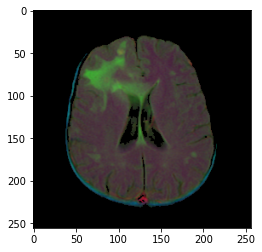

In [25]:
ret, markers = cv2.connectedComponents(thresh)

#Get the area taken by each component. Ignore label 0 since this is the background.
marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0] 
#Get label of largest component by area
largest_component = np.argmax(marker_area)+1 #Add 1 since we dropped zero above                        
#Get pixels which correspond to the brain
brain_mask = markers==largest_component

brain_out = img.copy()
#In a copy of the original image, clear those pixels that don't correspond to the brain
brain_out[brain_mask==False] = (0,0,0)
plt.imshow(brain_out)

(-0.5, 255.5, 255.5, -0.5)

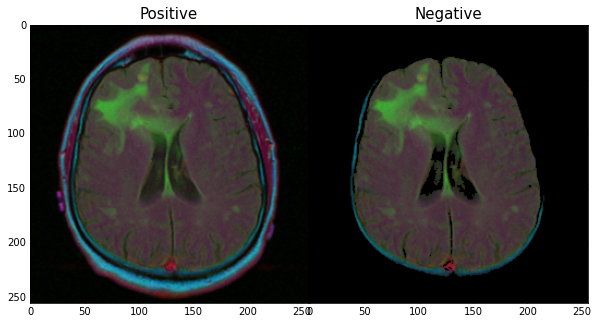

In [26]:
fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 2))

#MR Images
grid[0].imshow(img)
grid[0].set_title("Positive", fontsize=15)
grid[0].axis("off")
grid[1].imshow(brain_out)
grid[1].set_title("Negative", fontsize=15)
grid[1].axis("off")

In [39]:
def remove_skull(img):
    #Using otsu threshold and Connected components
    #Threshold the image to binary using Otsu's method
    img = cv2.resize(cv2.imread(img), (IMG_SIZE, IMG_SIZE))
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)
    ret, markers = cv2.connectedComponents(thresh)

    #Get the area taken by each component. Ignore label 0 since this is the background.
    marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0] 
    #Get label of largest component by area
    largest_component = np.argmax(marker_area)+1 #Add 1 since we dropped zero above                        
    #Get pixels which correspond to the brain
    brain_mask = markers==largest_component

    brain_out = img.copy()
    #In a copy of the original image, clear those pixels that don't correspond to the brain
    brain_out[brain_mask==False] = (0,0,0)
    #Visualization
    fig = plt.figure(figsize=(10., 10.))
    grid = ImageGrid(fig, 111, nrows_ncols=(1, 2))

    #MR Images
    grid[0].imshow(img)
    grid[0].set_title("Initial", fontsize=15)
    grid[0].axis("off")
    grid[1].imshow(brain_out)
    grid[1].set_title("without skull", fontsize=15)
    grid[1].axis("off")
    return brain_out

In [79]:
# Data
sample_yes_df = dataset[dataset["tumor"] == 1].sample(2)
image_yes = sample_yes_df.image_path.values

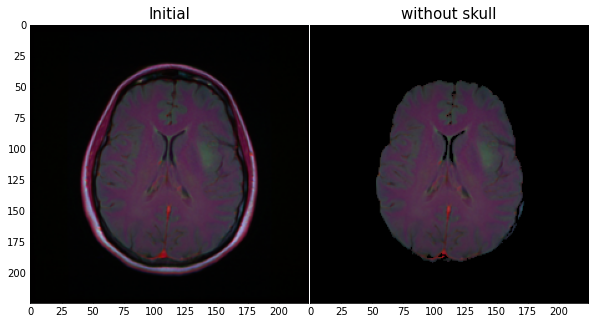

In [41]:
img = remove_skull(image_yes[0])

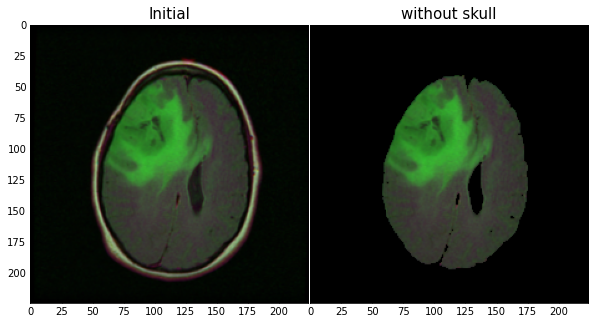

In [44]:
img = remove_skull(image_yes[0])

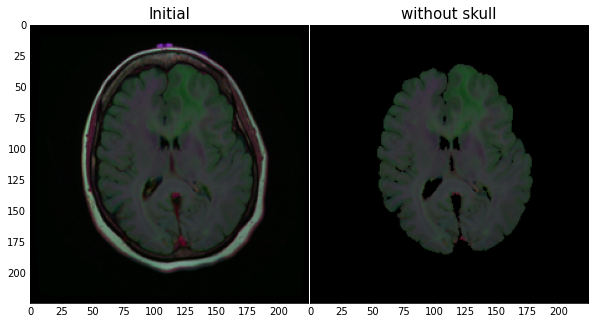

In [46]:
img = remove_skull(image_yes[0])

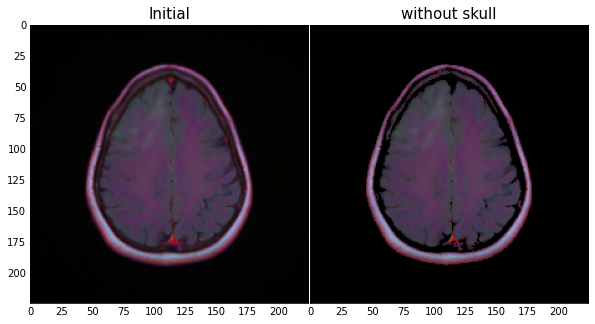

In [48]:
img = remove_skull(image_yes[0])

In [69]:
def remove_skull_adaptative_thresh(img):
    #Using otsu threshold and Connected components
    #Threshold the image to binary using Otsu's method
    img = cv2.resize(cv2.imread(img), (IMG_SIZE, IMG_SIZE))
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,3,3)

    ret, markers = cv2.connectedComponents(thresh)

    #Get the area taken by each component. Ignore label 0 since this is the background.
    marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0] 
    #Get label of largest component by area
    largest_component = np.argmax(marker_area)+1 #Add 1 since we dropped zero above                        
    #Get pixels which correspond to the brain
    brain_mask = markers==largest_component

    brain_out = img.copy()
    #In a copy of the original image, clear those pixels that don't correspond to the brain
    brain_out[brain_mask==False] = (0,0,0)
    #Visualization
    fig = plt.figure(figsize=(10., 10.))
    grid = ImageGrid(fig, 111, nrows_ncols=(1, 2))

    #MR Images
    grid[0].imshow(img)
    grid[0].set_title("Initial", fontsize=15)
    grid[0].axis("off")
    grid[1].imshow(brain_out)
    grid[1].set_title("without skull", fontsize=15)
    grid[1].axis("off")
    return brain_out

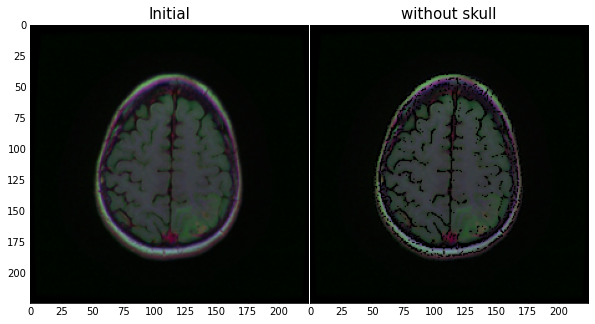

In [70]:
res = remove_skull_adaptative_thresh(image_yes[0])

In [83]:
def remove_skull_3(img):
    #Using otsu threshold and Connected components
    #Threshold the image to binary using Otsu's method
    img = cv2.resize(cv2.imread(img), (IMG_SIZE, IMG_SIZE))
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    thresh = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,3,2)

    ret, markers = cv2.connectedComponents(thresh)

    #Get the area taken by each component. Ignore label 0 since this is the background.
    marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0] 
    #Get label of largest component by area
    largest_component = np.argmax(marker_area)+1 #Add 1 since we dropped zero above                        
    #Get pixels which correspond to the brain
    brain_mask = markers==largest_component

    brain_out = img.copy()
    #In a copy of the original image, clear those pixels that don't correspond to the brain
    brain_out[brain_mask==False] = (0,0,0)
    #Visualization
    fig = plt.figure(figsize=(10., 10.))
    grid = ImageGrid(fig, 111, nrows_ncols=(1, 2))

    #MR Images
    grid[0].imshow(img)
    grid[0].set_title("Initial", fontsize=15)
    grid[0].axis("off")
    grid[1].imshow(brain_out)
    grid[1].set_title("without skull", fontsize=15)
    grid[1].axis("off")
    return brain_out

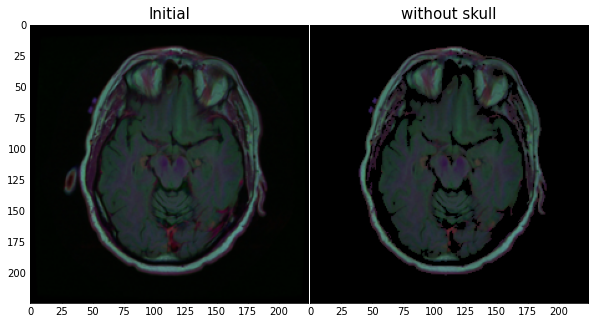

In [85]:
res = remove_skull(image_yes[0])

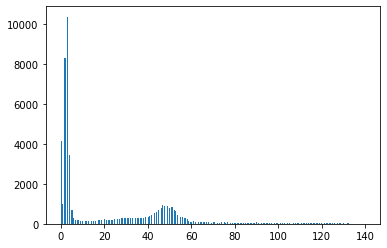

In [87]:
img = image_yes[0]
img = cv2.resize(cv2.imread(img), (IMG_SIZE, IMG_SIZE))
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.hist(gray.ravel(),256)
plt.show()

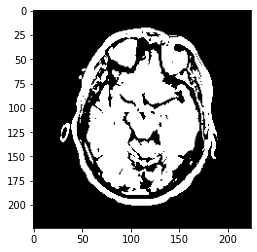

In [93]:
ret, thresh = cv2.threshold(gray,35, 255,cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')

In [103]:
def remove_skull_threshold(img,threshold=30):
    #Using otsu threshold and Connected components
    #Threshold the image to binary using Otsu's method
    img = cv2.resize(cv2.imread(img), (IMG_SIZE, IMG_SIZE))
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    plt.hist(gray.ravel(),256)
    ret, thresh = cv2.threshold(gray,threshold, 255,cv2.THRESH_BINARY)
    ret, markers = cv2.connectedComponents(thresh)

    #Get the area taken by each component. Ignore label 0 since this is the background.
    marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0] 
    #Get label of largest component by area
    largest_component = np.argmax(marker_area)+1 #Add 1 since we dropped zero above                        
    #Get pixels which correspond to the brain
    brain_mask = markers==largest_component

    brain_out = img.copy()
    #In a copy of the original image, clear those pixels that don't correspond to the brain
    brain_out[brain_mask==False] = (0,0,0)
    #Visualization
    fig = plt.figure(figsize=(10., 10.))
    grid = ImageGrid(fig, 111, nrows_ncols=(1, 2))

    #MR Images
    grid[0].imshow(img)
    grid[0].set_title("Initial", fontsize=15)
    grid[0].axis("off")
    grid[1].imshow(brain_out)
    grid[1].set_title("without skull", fontsize=15)
    grid[1].axis("off")
    return brain_out

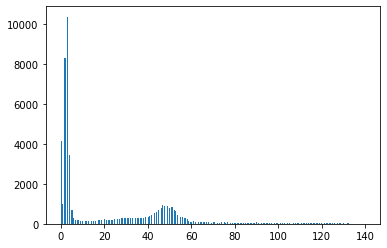

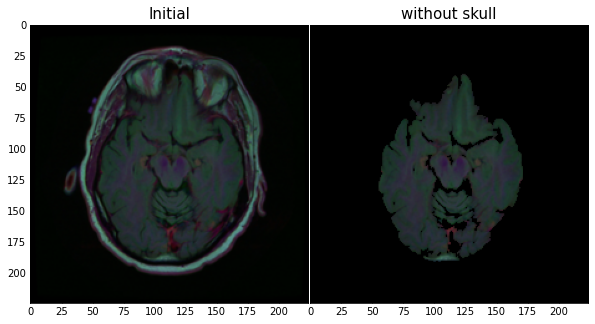

In [102]:
res = remove_skull_threshold(image_yes[0],30)

In [135]:
# Data
sample_yes_df = dataset[dataset["tumor"] == 1].sample(2)
image_yes = sample_yes_df.image_path.values

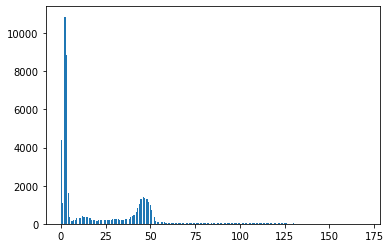

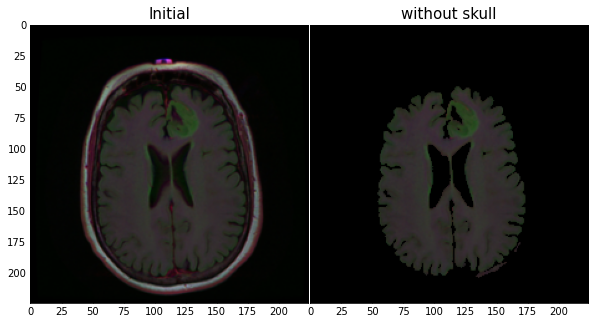

In [129]:
res = remove_skull_threshold(image_yes[0],30)

In [138]:
res = remove_skull(image_yes[0])

ValueError: attempt to get argmax of an empty sequence

In [137]:
image = cv2.imread(image_yes[0])

alpha = 1.95 # Contrast control (1.0-3.0)
beta = 0 # Brightness control (0-100)

manual_result = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)


plt.imshow('manual_result', manual_result)

C:\Users\mario\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\cbook\__init__.py:2265: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if v not in values:


ValueError: array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8) is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'